In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data = pd.read_csv("/home/leon/Desktop/market/data/vector_data_ratings.csv", header=0, index_col=0)

In [3]:
Z = linkage(data.values, 'ward')

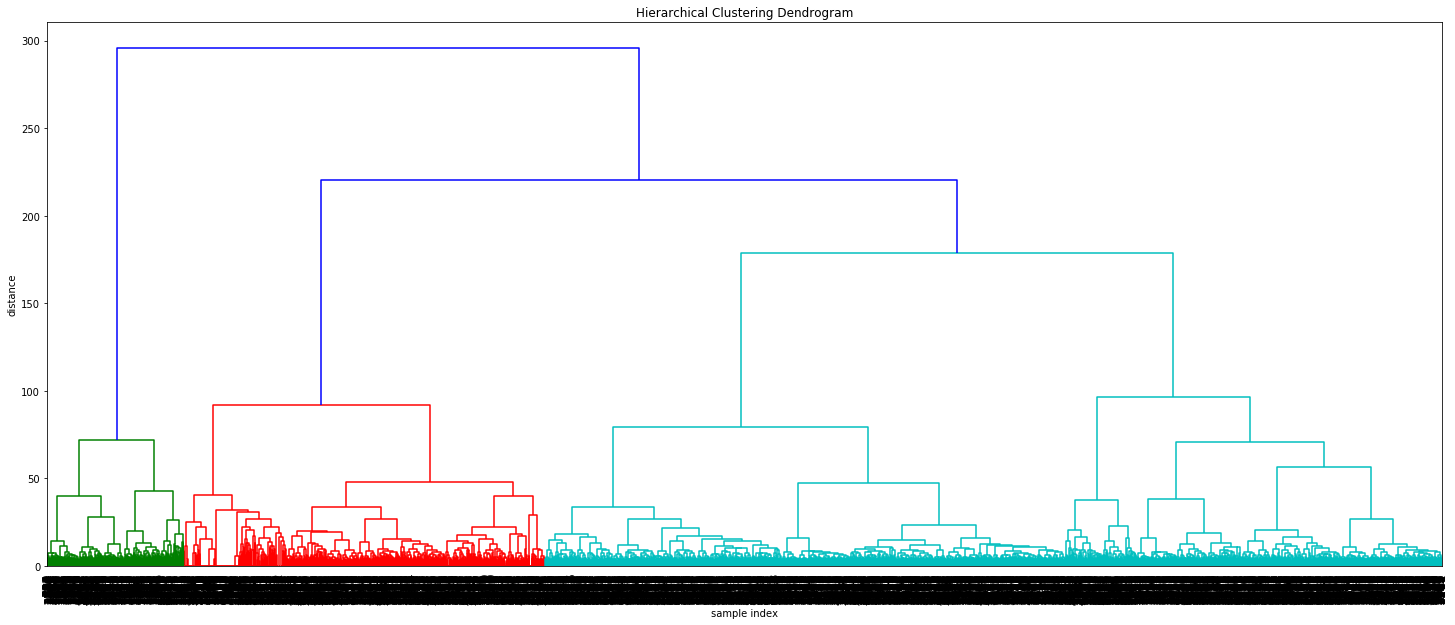

In [4]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

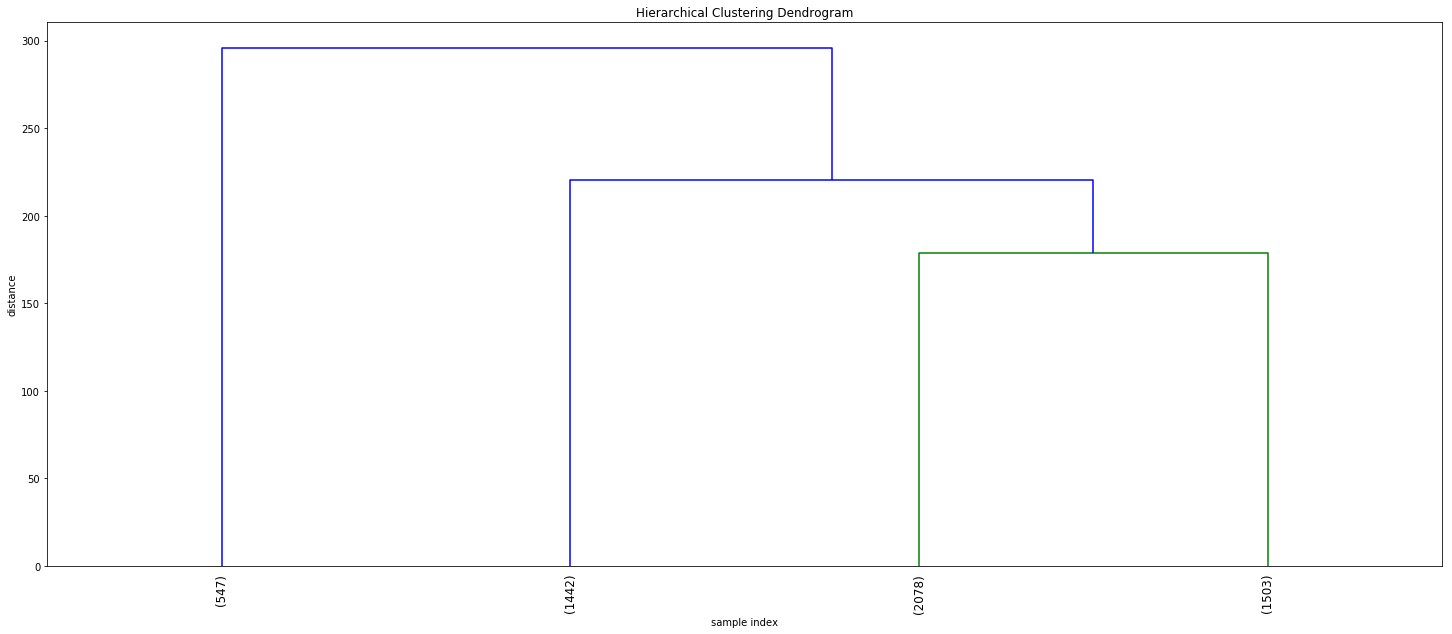

In [5]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    show_leaf_counts=True,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

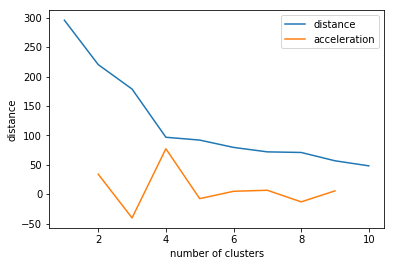

clusters:4


In [6]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, label="distance")

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev, label="acceleration")
plt.legend()
plt.xlabel("number of clusters")
plt.ylabel("distance")
plt.show()

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:{}".format(k))

In [7]:
from scipy.cluster.hierarchy import fcluster
k = 4
cluster = fcluster(Z, k, criterion='maxclust')

In [8]:
cluster = pd.DataFrame(cluster)
if data.shape[1] != 301:
    data = data.iloc[:,:-1]
data = pd.concat([data, cluster], axis=1)

In [9]:
cluster_data = []
for x in np.arange(1,k+1):
    cluster_data += [data[data.iloc[:,-1] == x]] 

In [10]:
[(np.mean(x.iloc[:,0])/3, x.shape[0]) for x in cluster_data]

[(1.4478976234003655, 547),
 (4.9535367545076285, 1442),
 (4.998556304138595, 2078),
 (3.6274118429807056, 1503)]

In [11]:
cluster_max = [np.amax(x, axis=0) for x in cluster_data]
cluster_mean = [np.mean(x, axis=0) for x in cluster_data]

In [12]:
for x in np.arange(k):
    cluster_max[x].iloc[0] = cluster_mean[x].iloc[0]

In [13]:
from scipy.spatial.distance import cityblock, euclidean

In [14]:
for x in np.arange(k):
    print(cluster_data[x].shape)
    dist = []
    cluster_squared = cluster_mean[x][:]**2
    for index, row in cluster_data[x].iterrows():
        dist.append(euclidean(row.values[:]**2, cluster_squared))
    
    cluster_data[x]["distance"] = dist
        
        
        

(547, 302)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1442, 302)
(2078, 302)
(1503, 302)


In [15]:
import json
with open("/home/leon/Desktop/market/data/all_data2.json", "r") as f:
    review_list = json.load(f)["reviews"]

In [16]:
example_reviews = []
for x in np.arange(k):
    example_index = np.argmin(cluster_data[x]["distance"])
    example_reviews += [review_list[example_index]]

example_reviews

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


[{'review_author': '',
  'review_comment_count': '',
  'review_header': 'Stop! Don’t buy it',
  'review_posted_date': '06 Apr 2018',
  'review_rating': '1.0 ',
  'review_text': 'Don’t get it, wherever on my face I put it my face flares up even more. It could be just me but I wouldn’t take any risk!!!'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Great mask!',
  'review_posted_date': '12 Aug 2017',
  'review_rating': '5.0 ',
  'review_text': 'Fun and makes my skin feel great'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Great product, note..',
  'review_posted_date': '15 Jan 2017',
  'review_rating': '5.0 ',
  'review_text': 'This product is so fun to use and is fun to do with friends. Note leaving it on for over 6-8 minutes will leave skin red other than that great product.'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'This is just fun. and it actually feels like it works',
  'review_posted_date':

In [17]:
cluster_reviews = []
for x in np.arange(k):
    reviews_index = list(cluster_data[x].index)
    cluster_reviews += [[review_list[y] for y in reviews_index]]
    
[x for x in cluster_reviews[2] if x["review_rating"] == '4.0 '][:10]

[{'review_author': '',
  'review_comment_count': '',
  'review_header': 'Four Stars',
  'review_posted_date': '13 Feb 2017',
  'review_rating': '4.0 ',
  'review_text': 'The mask refreshes my face and deep cleans. However, it causes acne on my forehead.'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Love this product!',
  'review_posted_date': '21 May 2016',
  'review_rating': '4.0 ',
  'review_text': "Really pulls blackheads to the surface! About once a week my daughter and I will wash or faces and use this mask. It only has to be on for a couple of minutes, then as soon as we wash it off we look in the mirror and everything has come to the surface! We'll both be using this product from now on."},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Fun product that works well on acne prone skin',
  'review_posted_date': '08 Sep 2016',
  'review_rating': '4.0 ',
  'review_text': 'Helps with pimples'}]

In [18]:
import matplotlib.pyplot as plt

---------------


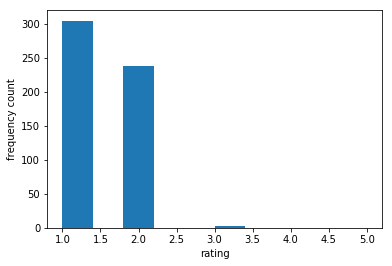

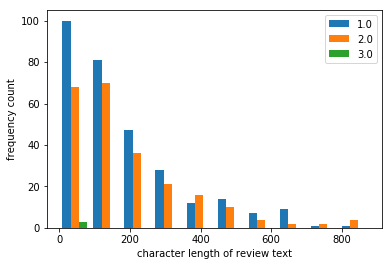

---------------


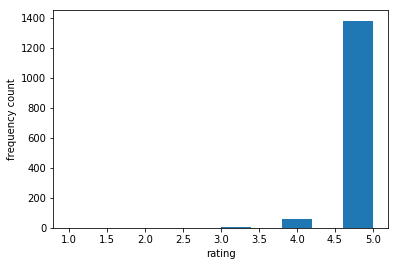

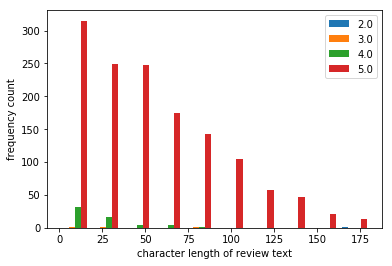

---------------


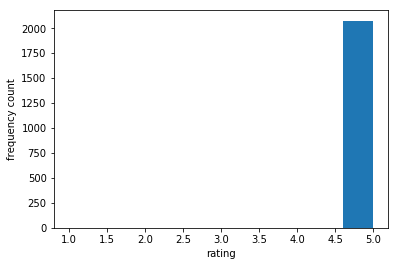

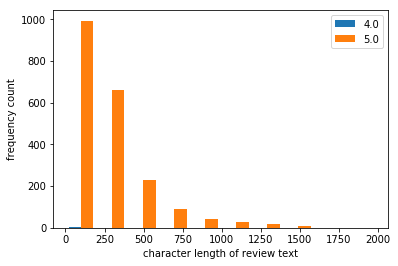

---------------


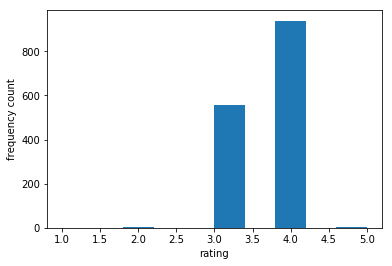

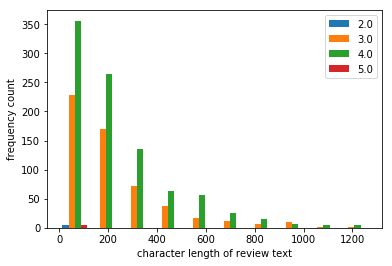

In [19]:
for reviews in cluster_reviews:
    print('---------------')
    ratings = [float(review["review_rating"]) for review in reviews]
    plt.hist(ratings, range = (1,5))
    plt.xlabel("rating")
    plt.ylabel("frequency count")
    plt.show()
    
    ratings = [float(review["review_rating"]) for review in reviews]

    lengths = []
    for rating in set(ratings):
        lengths += [[len(x["review_text"]) for x in reviews if float(x["review_rating"]) == rating]]
    
    maxi = np.max([x for y in lengths for x in y])
    plt.hist(lengths, range=(0,maxi*0.6), label=list(set(ratings)))
    plt.legend()
    plt.xlabel("character length of review text")
    plt.ylabel("frequency count")
    plt.show()

In [20]:
from numpy.linalg import norm
import spacy
nlp = spacy.load('en_core_web_md')

def cosine(a, b):
    return(a.dot(b)/np.sqrt(np.sum(a**2) *np.sum(b**2)))




In [21]:
def most_similar_vec(vector):
    word = nlp.vocab[u'dog']
    queries = [w for w in word.vocab if w.prob >= -14]
    similarity = [(x,y) for x, y in zip(queries, [cosine(vector, w.vector) for w in queries])]
    by_similarity = sorted(similarity, key=lambda x: x[1])
    similarity_word = [(x.lower_, y) for x, y in by_similarity]
    print(similarity_word[:1000])

    return( [w[0].lower_ for w in by_similarity[:10]])

In [ ]:
connections = []
for vector1 in cluster_mean[0]:
    connections.append([most_similar_vec((vector2 - vector1).values[1:301]) for vector2 in cluster_mean])
    print(connections[-1])
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[('volunteering', -0.1489376475708512), ('but', 0.6326041329496915)]


In [ ]:
for word_list in connections:
    print(pd.DataFrame([x[:10] for x in word_list]))
    

In [ ]:
cosine(cluster_mean[0].values[1:301] + nlp.vocab[u'foles'].vector, cluster_mean[0].values[1:301])